In [149]:
import pandas as pd 
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials 
from collections import Counter

In [150]:
sp = spotipy.Spotify() 

cid ="d062190fd93b4e4488e75ae2d9256814" 

secret = "5afbd4a19ee54607be0db6036fb417c2"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

sp.trace=False 

In [151]:
playlist_l = sp.user_playlist("Liked", "3cYqEaPBFyxqlXbViPtzDv?si=3553c6c98f714847") 
playlist_d = sp.user_playlist("Disliked", "4HC1kIY2bof1CHfZqmo8u1?si=080494e8e1bf4f75") 

playlist_l
playlist_d

{'collaborative': False,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/4HC1kIY2bof1CHfZqmo8u1'},
 'followers': {'href': None, 'total': 1},
 'href': 'https://api.spotify.com/v1/playlists/4HC1kIY2bof1CHfZqmo8u1?additional_types=track',
 'id': '4HC1kIY2bof1CHfZqmo8u1',
 'images': [{'height': 640,
   'url': 'https://mosaic.scdn.co/640/ab67616d0000b2734c9476a0b18a79e53ab01816ab67616d0000b2737dd8f95320e8ef08aa121dfeab67616d0000b273903f1a327630a0be2a9856f0ab67616d0000b273fc57994e3890a5246cce7685',
   'width': 640},
  {'height': 300,
   'url': 'https://mosaic.scdn.co/300/ab67616d0000b2734c9476a0b18a79e53ab01816ab67616d0000b2737dd8f95320e8ef08aa121dfeab67616d0000b273903f1a327630a0be2a9856f0ab67616d0000b273fc57994e3890a5246cce7685',
   'width': 300},
  {'height': 60,
   'url': 'https://mosaic.scdn.co/60/ab67616d0000b2734c9476a0b18a79e53ab01816ab67616d0000b2737dd8f95320e8ef08aa121dfeab67616d0000b273903f1a327630a0be2a9856f0ab67616d0000b273fc57994e3890a5246cce

In [152]:
liked_songs = playlist_l["tracks"]["items"] 
liked_songs

[{'added_at': '2022-12-05T18:12:03Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/bullseye012'},
   'href': 'https://api.spotify.com/v1/users/bullseye012',
   'id': 'bullseye012',
   'type': 'user',
   'uri': 'spotify:user:bullseye012'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/19eLuQmk9aCobbVDHc6eek'},
      'href': 'https://api.spotify.com/v1/artists/19eLuQmk9aCobbVDHc6eek',
      'id': '19eLuQmk9aCobbVDHc6eek',
      'name': 'Louis Armstrong',
      'type': 'artist',
      'uri': 'spotify:artist:19eLuQmk9aCobbVDHc6eek'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
  

In [153]:
liked_ids = [] 
for i in range(len(liked_songs)): 
    liked_ids.append(liked_songs[i]["track"]["id"])

In [154]:
liked_features = sp.audio_features(liked_ids) 

liked_features

[{'danceability': 0.271,
  'energy': 0.165,
  'key': 5,
  'loudness': -20.652,
  'mode': 1,
  'speechiness': 0.0351,
  'acousticness': 0.729,
  'instrumentalness': 1.6e-06,
  'liveness': 0.118,
  'valence': 0.203,
  'tempo': 77.082,
  'type': 'audio_features',
  'id': '29U7stRjqHU6rMiS8BfaI9',
  'uri': 'spotify:track:29U7stRjqHU6rMiS8BfaI9',
  'track_href': 'https://api.spotify.com/v1/tracks/29U7stRjqHU6rMiS8BfaI9',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/29U7stRjqHU6rMiS8BfaI9',
  'duration_ms': 139227,
  'time_signature': 4},
 {'danceability': 0.177,
  'energy': 0.215,
  'key': 3,
  'loudness': -9.886,
  'mode': 1,
  'speechiness': 0.0335,
  'acousticness': 0.807,
  'instrumentalness': 0.000125,
  'liveness': 0.0921,
  'valence': 0.0415,
  'tempo': 75.862,
  'type': 'audio_features',
  'id': '2MfwT3SKUyF0na2LCa2fCp',
  'uri': 'spotify:track:2MfwT3SKUyF0na2LCa2fCp',
  'track_href': 'https://api.spotify.com/v1/tracks/2MfwT3SKUyF0na2LCa2fCp',
  'analysis_url': 'http

In [155]:
liked_df = pd.DataFrame(liked_features)
liked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.271,0.165,5,-20.652,1,0.0351,0.7290,0.000002,0.1180,0.2030,77.082,audio_features,29U7stRjqHU6rMiS8BfaI9,spotify:track:29U7stRjqHU6rMiS8BfaI9,https://api.spotify.com/v1/tracks/29U7stRjqHU6...,https://api.spotify.com/v1/audio-analysis/29U7...,139227,4
1,0.177,0.215,3,-9.886,1,0.0335,0.8070,0.000125,0.0921,0.0415,75.862,audio_features,2MfwT3SKUyF0na2LCa2fCp,spotify:track:2MfwT3SKUyF0na2LCa2fCp,https://api.spotify.com/v1/tracks/2MfwT3SKUyF0...,https://api.spotify.com/v1/audio-analysis/2Mfw...,188864,3
2,0.530,0.497,0,-11.348,1,0.0322,0.4980,0.000384,0.0665,0.1000,141.977,audio_features,5b7wNSn8yuj5ZZ3JAlzoBt,spotify:track:5b7wNSn8yuj5ZZ3JAlzoBt,https://api.spotify.com/v1/tracks/5b7wNSn8yuj5...,https://api.spotify.com/v1/audio-analysis/5b7w...,345933,4
3,0.617,0.567,0,-4.188,1,0.0828,0.0584,0.000000,0.0933,0.5050,90.246,audio_features,1CnPYaKxTVb4LWOtiGOm0m,spotify:track:1CnPYaKxTVb4LWOtiGOm0m,https://api.spotify.com/v1/tracks/1CnPYaKxTVb4...,https://api.spotify.com/v1/audio-analysis/1CnP...,217603,4
4,0.214,0.367,6,-10.858,0,0.0321,0.8440,0.018100,0.1880,0.1750,79.854,audio_features,1M8OAc4NnD5GFMUiqjebaS,spotify:track:1M8OAc4NnD5GFMUiqjebaS,https://api.spotify.com/v1/tracks/1M8OAc4NnD5G...,https://api.spotify.com/v1/audio-analysis/1M8O...,281844,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.374,0.249,1,-10.985,1,0.0395,0.9360,0.008760,0.1140,0.0633,128.018,audio_features,4eCXQY1vh9XMW66LmS5alP,spotify:track:4eCXQY1vh9XMW66LmS5alP,https://api.spotify.com/v1/tracks/4eCXQY1vh9XM...,https://api.spotify.com/v1/audio-analysis/4eCX...,200093,4
96,0.588,0.362,8,-13.062,1,0.0295,0.4330,0.004680,0.0904,0.0995,132.472,audio_features,6UzdCUyZa27ez12pK56uSo,spotify:track:6UzdCUyZa27ez12pK56uSo,https://api.spotify.com/v1/tracks/6UzdCUyZa27e...,https://api.spotify.com/v1/audio-analysis/6Uzd...,379653,4
97,0.401,0.567,10,-9.131,1,0.0355,0.1710,0.008590,0.1030,0.3620,171.059,audio_features,6FQcdl2PzmsoXRF3F1flZ5,spotify:track:6FQcdl2PzmsoXRF3F1flZ5,https://api.spotify.com/v1/tracks/6FQcdl2Pzmso...,https://api.spotify.com/v1/audio-analysis/6FQc...,217973,3
98,0.626,0.308,6,-17.163,0,0.0294,0.8300,0.057800,0.1080,0.3230,129.928,audio_features,5kkqN6Lx3ZioloqqxC7Kyj,spotify:track:5kkqN6Lx3ZioloqqxC7Kyj,https://api.spotify.com/v1/tracks/5kkqN6Lx3Zio...,https://api.spotify.com/v1/audio-analysis/5kkq...,226890,4


In [156]:
target = []

for i in range(liked_df.shape[0]):
    target.append(1)

In [157]:
liked_df['target'] = target
liked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0.271,0.165,5,-20.652,1,0.0351,0.7290,0.000002,0.1180,0.2030,77.082,audio_features,29U7stRjqHU6rMiS8BfaI9,spotify:track:29U7stRjqHU6rMiS8BfaI9,https://api.spotify.com/v1/tracks/29U7stRjqHU6...,https://api.spotify.com/v1/audio-analysis/29U7...,139227,4,1
1,0.177,0.215,3,-9.886,1,0.0335,0.8070,0.000125,0.0921,0.0415,75.862,audio_features,2MfwT3SKUyF0na2LCa2fCp,spotify:track:2MfwT3SKUyF0na2LCa2fCp,https://api.spotify.com/v1/tracks/2MfwT3SKUyF0...,https://api.spotify.com/v1/audio-analysis/2Mfw...,188864,3,1
2,0.530,0.497,0,-11.348,1,0.0322,0.4980,0.000384,0.0665,0.1000,141.977,audio_features,5b7wNSn8yuj5ZZ3JAlzoBt,spotify:track:5b7wNSn8yuj5ZZ3JAlzoBt,https://api.spotify.com/v1/tracks/5b7wNSn8yuj5...,https://api.spotify.com/v1/audio-analysis/5b7w...,345933,4,1
3,0.617,0.567,0,-4.188,1,0.0828,0.0584,0.000000,0.0933,0.5050,90.246,audio_features,1CnPYaKxTVb4LWOtiGOm0m,spotify:track:1CnPYaKxTVb4LWOtiGOm0m,https://api.spotify.com/v1/tracks/1CnPYaKxTVb4...,https://api.spotify.com/v1/audio-analysis/1CnP...,217603,4,1
4,0.214,0.367,6,-10.858,0,0.0321,0.8440,0.018100,0.1880,0.1750,79.854,audio_features,1M8OAc4NnD5GFMUiqjebaS,spotify:track:1M8OAc4NnD5GFMUiqjebaS,https://api.spotify.com/v1/tracks/1M8OAc4NnD5G...,https://api.spotify.com/v1/audio-analysis/1M8O...,281844,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.374,0.249,1,-10.985,1,0.0395,0.9360,0.008760,0.1140,0.0633,128.018,audio_features,4eCXQY1vh9XMW66LmS5alP,spotify:track:4eCXQY1vh9XMW66LmS5alP,https://api.spotify.com/v1/tracks/4eCXQY1vh9XM...,https://api.spotify.com/v1/audio-analysis/4eCX...,200093,4,1
96,0.588,0.362,8,-13.062,1,0.0295,0.4330,0.004680,0.0904,0.0995,132.472,audio_features,6UzdCUyZa27ez12pK56uSo,spotify:track:6UzdCUyZa27ez12pK56uSo,https://api.spotify.com/v1/tracks/6UzdCUyZa27e...,https://api.spotify.com/v1/audio-analysis/6Uzd...,379653,4,1
97,0.401,0.567,10,-9.131,1,0.0355,0.1710,0.008590,0.1030,0.3620,171.059,audio_features,6FQcdl2PzmsoXRF3F1flZ5,spotify:track:6FQcdl2PzmsoXRF3F1flZ5,https://api.spotify.com/v1/tracks/6FQcdl2Pzmso...,https://api.spotify.com/v1/audio-analysis/6FQc...,217973,3,1
98,0.626,0.308,6,-17.163,0,0.0294,0.8300,0.057800,0.1080,0.3230,129.928,audio_features,5kkqN6Lx3ZioloqqxC7Kyj,spotify:track:5kkqN6Lx3ZioloqqxC7Kyj,https://api.spotify.com/v1/tracks/5kkqN6Lx3Zio...,https://api.spotify.com/v1/audio-analysis/5kkq...,226890,4,1


In [158]:
disliked_songs = playlist_d["tracks"]["items"] 
disliked_songs

[{'added_at': '2022-12-06T12:39:03Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/bullseye012'},
   'href': 'https://api.spotify.com/v1/users/bullseye012',
   'id': 'bullseye012',
   'type': 'user',
   'uri': 'spotify:user:bullseye012'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Ts9of7VPZElwPQnqnDSfW'},
      'href': 'https://api.spotify.com/v1/artists/1Ts9of7VPZElwPQnqnDSfW',
      'id': '1Ts9of7VPZElwPQnqnDSfW',
      'name': 'Lyanno',
      'type': 'artist',
      'uri': 'spotify:artist:1Ts9of7VPZElwPQnqnDSfW'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/1mcTU81TzQhprhouKaTkpq'},
      'href': 'https://api.spotify.com/v1/artists/1mcTU81TzQhprhouKaTkpq',
      'id': '1mcTU81TzQhprhouKaTkpq',
      'name': 'Rauw Alejandro',
      'type': 'artist',
      'uri': 'spotify:artist:1mcTU81TzQhprhouKaTkpq'},


In [159]:
disliked_ids = []
for i in range(len(disliked_songs)): 
    disliked_ids.append(disliked_songs[i]["track"]["id"])

In [160]:
disliked_features = sp.audio_features(disliked_ids) 

disliked_features

[{'danceability': 0.742,
  'energy': 0.497,
  'key': 0,
  'loudness': -9.381,
  'mode': 0,
  'speechiness': 0.0746,
  'acousticness': 0.249,
  'instrumentalness': 0.00335,
  'liveness': 0.0993,
  'valence': 0.558,
  'tempo': 156.013,
  'type': 'audio_features',
  'id': '3dEtfTtCXWW7N8WQ9FD29z',
  'uri': 'spotify:track:3dEtfTtCXWW7N8WQ9FD29z',
  'track_href': 'https://api.spotify.com/v1/tracks/3dEtfTtCXWW7N8WQ9FD29z',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3dEtfTtCXWW7N8WQ9FD29z',
  'duration_ms': 310860,
  'time_signature': 4},
 {'danceability': 0.699,
  'energy': 0.588,
  'key': 9,
  'loudness': -6.533,
  'mode': 0,
  'speechiness': 0.0402,
  'acousticness': 0.00807,
  'instrumentalness': 0.000131,
  'liveness': 0.107,
  'valence': 0.35,
  'tempo': 151.971,
  'type': 'audio_features',
  'id': '2TaWcNAkUM6buVOkL0CNh9',
  'uri': 'spotify:track:2TaWcNAkUM6buVOkL0CNh9',
  'track_href': 'https://api.spotify.com/v1/tracks/2TaWcNAkUM6buVOkL0CNh9',
  'analysis_url': 'htt

In [161]:
disliked_df = pd.DataFrame(disliked_features)
disliked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.742,0.4970,0,-9.381,0,0.0746,0.24900,0.003350,0.0993,0.5580,156.013,audio_features,3dEtfTtCXWW7N8WQ9FD29z,spotify:track:3dEtfTtCXWW7N8WQ9FD29z,https://api.spotify.com/v1/tracks/3dEtfTtCXWW7...,https://api.spotify.com/v1/audio-analysis/3dEt...,310860,4
1,0.699,0.5880,9,-6.533,0,0.0402,0.00807,0.000131,0.1070,0.3500,151.971,audio_features,2TaWcNAkUM6buVOkL0CNh9,spotify:track:2TaWcNAkUM6buVOkL0CNh9,https://api.spotify.com/v1/tracks/2TaWcNAkUM6b...,https://api.spotify.com/v1/audio-analysis/2TaW...,199122,4
2,0.642,0.7230,1,-6.149,1,0.2430,0.58000,0.000942,0.1120,0.4870,186.043,audio_features,1EYeZGTMCjV7uVey5fNWXM,spotify:track:1EYeZGTMCjV7uVey5fNWXM,https://api.spotify.com/v1/tracks/1EYeZGTMCjV7...,https://api.spotify.com/v1/audio-analysis/1EYe...,135480,4
3,0.862,0.5060,10,-8.651,0,0.2670,0.05420,0.000030,0.1170,0.5120,136.052,audio_features,5h1Zdr8ghV5RaWjtdfVo8w,spotify:track:5h1Zdr8ghV5RaWjtdfVo8w,https://api.spotify.com/v1/tracks/5h1Zdr8ghV5R...,https://api.spotify.com/v1/audio-analysis/5h1Z...,198582,4
4,0.921,0.4320,0,-11.109,1,0.0502,0.50600,0.002230,0.0617,0.6930,112.117,audio_features,4Pv7OY4tfCA8KIdtlkANOS,spotify:track:4Pv7OY4tfCA8KIdtlkANOS,https://api.spotify.com/v1/tracks/4Pv7OY4tfCA8...,https://api.spotify.com/v1/audio-analysis/4Pv7...,178320,4
5,0.619,0.6720,0,-5.770,0,0.0468,0.23700,0.001490,0.1170,0.3360,163.942,audio_features,1iEMuRRbD04w92WzHYkJrF,spotify:track:1iEMuRRbD04w92WzHYkJrF,https://api.spotify.com/v1/tracks/1iEMuRRbD04w...,https://api.spotify.com/v1/audio-analysis/1iEM...,180227,4
6,0.697,0.7190,7,-6.314,0,0.0571,0.50300,0.000000,0.1280,0.7510,86.000,audio_features,2ssVmL3NSOKPW46GWgXyu4,spotify:track:2ssVmL3NSOKPW46GWgXyu4,https://api.spotify.com/v1/tracks/2ssVmL3NSOKP...,https://api.spotify.com/v1/audio-analysis/2ssV...,193083,4
7,0.590,0.8650,7,-4.616,0,0.0516,0.25300,0.000004,0.1720,0.4180,150.068,audio_features,3Vlfg0IreM7wVuZA0zoGDd,spotify:track:3Vlfg0IreM7wVuZA0zoGDd,https://api.spotify.com/v1/tracks/3Vlfg0IreM7w...,https://api.spotify.com/v1/audio-analysis/3Vlf...,239630,4
8,0.757,0.6960,11,-9.406,0,0.1610,0.09250,0.005510,0.1290,0.5260,93.003,audio_features,0O2zRCntGYssJk4bGn6dXk,spotify:track:0O2zRCntGYssJk4bGn6dXk,https://api.spotify.com/v1/tracks/0O2zRCntGYss...,https://api.spotify.com/v1/audio-analysis/0O2z...,210640,4
9,0.957,0.7170,8,-7.801,1,0.1730,0.12800,0.000000,0.0896,0.8550,116.020,audio_features,5JXUr2W37Xcg2KWBDTUKko,spotify:track:5JXUr2W37Xcg2KWBDTUKko,https://api.spotify.com/v1/tracks/5JXUr2W37Xcg...,https://api.spotify.com/v1/audio-analysis/5JXU...,87007,4


In [162]:
liked_target = []

for i in range(disliked_df.shape[0]):
    liked_target.append(0)

In [163]:
disliked_df['target'] = liked_target
disliked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0.742,0.4970,0,-9.381,0,0.0746,0.24900,0.003350,0.0993,0.5580,156.013,audio_features,3dEtfTtCXWW7N8WQ9FD29z,spotify:track:3dEtfTtCXWW7N8WQ9FD29z,https://api.spotify.com/v1/tracks/3dEtfTtCXWW7...,https://api.spotify.com/v1/audio-analysis/3dEt...,310860,4,0
1,0.699,0.5880,9,-6.533,0,0.0402,0.00807,0.000131,0.1070,0.3500,151.971,audio_features,2TaWcNAkUM6buVOkL0CNh9,spotify:track:2TaWcNAkUM6buVOkL0CNh9,https://api.spotify.com/v1/tracks/2TaWcNAkUM6b...,https://api.spotify.com/v1/audio-analysis/2TaW...,199122,4,0
2,0.642,0.7230,1,-6.149,1,0.2430,0.58000,0.000942,0.1120,0.4870,186.043,audio_features,1EYeZGTMCjV7uVey5fNWXM,spotify:track:1EYeZGTMCjV7uVey5fNWXM,https://api.spotify.com/v1/tracks/1EYeZGTMCjV7...,https://api.spotify.com/v1/audio-analysis/1EYe...,135480,4,0
3,0.862,0.5060,10,-8.651,0,0.2670,0.05420,0.000030,0.1170,0.5120,136.052,audio_features,5h1Zdr8ghV5RaWjtdfVo8w,spotify:track:5h1Zdr8ghV5RaWjtdfVo8w,https://api.spotify.com/v1/tracks/5h1Zdr8ghV5R...,https://api.spotify.com/v1/audio-analysis/5h1Z...,198582,4,0
4,0.921,0.4320,0,-11.109,1,0.0502,0.50600,0.002230,0.0617,0.6930,112.117,audio_features,4Pv7OY4tfCA8KIdtlkANOS,spotify:track:4Pv7OY4tfCA8KIdtlkANOS,https://api.spotify.com/v1/tracks/4Pv7OY4tfCA8...,https://api.spotify.com/v1/audio-analysis/4Pv7...,178320,4,0
5,0.619,0.6720,0,-5.770,0,0.0468,0.23700,0.001490,0.1170,0.3360,163.942,audio_features,1iEMuRRbD04w92WzHYkJrF,spotify:track:1iEMuRRbD04w92WzHYkJrF,https://api.spotify.com/v1/tracks/1iEMuRRbD04w...,https://api.spotify.com/v1/audio-analysis/1iEM...,180227,4,0
6,0.697,0.7190,7,-6.314,0,0.0571,0.50300,0.000000,0.1280,0.7510,86.000,audio_features,2ssVmL3NSOKPW46GWgXyu4,spotify:track:2ssVmL3NSOKPW46GWgXyu4,https://api.spotify.com/v1/tracks/2ssVmL3NSOKP...,https://api.spotify.com/v1/audio-analysis/2ssV...,193083,4,0
7,0.590,0.8650,7,-4.616,0,0.0516,0.25300,0.000004,0.1720,0.4180,150.068,audio_features,3Vlfg0IreM7wVuZA0zoGDd,spotify:track:3Vlfg0IreM7wVuZA0zoGDd,https://api.spotify.com/v1/tracks/3Vlfg0IreM7w...,https://api.spotify.com/v1/audio-analysis/3Vlf...,239630,4,0
8,0.757,0.6960,11,-9.406,0,0.1610,0.09250,0.005510,0.1290,0.5260,93.003,audio_features,0O2zRCntGYssJk4bGn6dXk,spotify:track:0O2zRCntGYssJk4bGn6dXk,https://api.spotify.com/v1/tracks/0O2zRCntGYss...,https://api.spotify.com/v1/audio-analysis/0O2z...,210640,4,0
9,0.957,0.7170,8,-7.801,1,0.1730,0.12800,0.000000,0.0896,0.8550,116.020,audio_features,5JXUr2W37Xcg2KWBDTUKko,spotify:track:5JXUr2W37Xcg2KWBDTUKko,https://api.spotify.com/v1/tracks/5JXUr2W37Xcg...,https://api.spotify.com/v1/audio-analysis/5JXU...,87007,4,0


In [164]:
#combining

frames = [liked_df, disliked_df]
  
result = pd.concat(frames).reset_index()
result

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0,0.271,0.1650,5,-20.652,1,0.0351,0.7290,0.000002,0.1180,0.2030,77.082,audio_features,29U7stRjqHU6rMiS8BfaI9,spotify:track:29U7stRjqHU6rMiS8BfaI9,https://api.spotify.com/v1/tracks/29U7stRjqHU6...,https://api.spotify.com/v1/audio-analysis/29U7...,139227,4,1
1,1,0.177,0.2150,3,-9.886,1,0.0335,0.8070,0.000125,0.0921,0.0415,75.862,audio_features,2MfwT3SKUyF0na2LCa2fCp,spotify:track:2MfwT3SKUyF0na2LCa2fCp,https://api.spotify.com/v1/tracks/2MfwT3SKUyF0...,https://api.spotify.com/v1/audio-analysis/2Mfw...,188864,3,1
2,2,0.530,0.4970,0,-11.348,1,0.0322,0.4980,0.000384,0.0665,0.1000,141.977,audio_features,5b7wNSn8yuj5ZZ3JAlzoBt,spotify:track:5b7wNSn8yuj5ZZ3JAlzoBt,https://api.spotify.com/v1/tracks/5b7wNSn8yuj5...,https://api.spotify.com/v1/audio-analysis/5b7w...,345933,4,1
3,3,0.617,0.5670,0,-4.188,1,0.0828,0.0584,0.000000,0.0933,0.5050,90.246,audio_features,1CnPYaKxTVb4LWOtiGOm0m,spotify:track:1CnPYaKxTVb4LWOtiGOm0m,https://api.spotify.com/v1/tracks/1CnPYaKxTVb4...,https://api.spotify.com/v1/audio-analysis/1CnP...,217603,4,1
4,4,0.214,0.3670,6,-10.858,0,0.0321,0.8440,0.018100,0.1880,0.1750,79.854,audio_features,1M8OAc4NnD5GFMUiqjebaS,spotify:track:1M8OAc4NnD5GFMUiqjebaS,https://api.spotify.com/v1/tracks/1M8OAc4NnD5G...,https://api.spotify.com/v1/audio-analysis/1M8O...,281844,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,36,0.270,0.4740,5,-11.531,1,0.0337,0.6060,0.000000,0.4230,0.5240,79.144,audio_features,2ydyrhV1UFnNEIZjFAQqNF,spotify:track:2ydyrhV1UFnNEIZjFAQqNF,https://api.spotify.com/v1/tracks/2ydyrhV1UFnN...,https://api.spotify.com/v1/audio-analysis/2ydy...,203720,4,0
137,37,0.330,0.4390,10,-9.801,0,0.0410,0.6250,0.000368,0.1770,0.2100,175.676,audio_features,5NPg92vbjaGk4q9mh7MMEM,spotify:track:5NPg92vbjaGk4q9mh7MMEM,https://api.spotify.com/v1/tracks/5NPg92vbjaGk...,https://api.spotify.com/v1/audio-analysis/5NPg...,294532,4,0
138,38,0.679,0.1560,2,-13.920,1,0.0360,0.9080,0.000000,0.1030,0.2650,135.846,audio_features,6Qu9OC9o7f8QvTQtrWYdQX,spotify:track:6Qu9OC9o7f8QvTQtrWYdQX,https://api.spotify.com/v1/tracks/6Qu9OC9o7f8Q...,https://api.spotify.com/v1/audio-analysis/6Qu9...,234176,3,0
139,39,0.435,0.1590,7,-17.582,0,0.0494,0.9790,0.377000,0.1170,0.3320,109.076,audio_features,3m8Zy0Tw6Fl1RoWZLCnZT7,spotify:track:3m8Zy0Tw6Fl1RoWZLCnZT7,https://api.spotify.com/v1/tracks/3m8Zy0Tw6Fl1...,https://api.spotify.com/v1/audio-analysis/3m8Z...,416733,4,0


In [165]:
#shuffle
result = result.sample(frac = 1).reset_index()
result

,level_0,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,23,23,0.417,0.669,1,-5.544,1,0.0296,0.00329,0.000169,...,0.5390,76.988,audio_features,2N977oXVcbzWqT4m3U698h,spotify:track:2N977oXVcbzWqT4m3U698h,https://api.spotify.com/v1/tracks/2N977oXVcbzW...,https://api.spotify.com/v1/audio-analysis/2N97...,214387,4,1
1,74,74,0.508,0.460,6,-9.837,0,0.0604,0.75400,0.637000,...,0.1490,79.959,audio_features,1sSqXPcyAUHe6eF3PTTEpL,spotify:track:1sSqXPcyAUHe6eF3PTTEpL,https://api.spotify.com/v1/tracks/1sSqXPcyAUHe...,https://api.spotify.com/v1/audio-analysis/1sSq...,302264,4,1
2,48,48,0.417,0.202,0,-10.976,1,0.0357,0.93500,0.000000,...,0.3230,118.029,audio_features,6qj02zSeEJGWZ4c0dn5QzJ,spotify:track:6qj02zSeEJGWZ4c0dn5QzJ,https://api.spotify.com/v1/tracks/6qj02zSeEJGW...,https://api.spotify.com/v1/audio-analysis/6qj0...,194544,4,1
3,63,63,0.520,0.572,6,-12.838,0,0.0402,0.35200,0.947000,...,0.0985,157.934,audio_features,20Wh3jLHKWrbVpyZN2CgVa,spotify:track:20Wh3jLHKWrbVpyZN2CgVa,https://api.spotify.com/v1/tracks/20Wh3jLHKWrb...,https://api.spotify.com/v1/audio-analysis/20Wh...,136400,3,1
4,107,7,0.590,0.865,7,-4.616,0,0.0516,0.25300,0.000004,...,0.4180,150.068,audio_features,3Vlfg0IreM7wVuZA0zoGDd,spotify:track:3Vlfg0IreM7wVuZA0zoGDd,https://api.spotify.com/v1/tracks/3Vlfg0IreM7w...,https://api.spotify.com/v1/audio-analysis/3Vlf...,239630,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,83,83,0.562,0.413,9,-11.356,0,0.0292,0.93400,0.262000,...,0.2110,122.127,audio_features,1HYiZbH7QTKfOUe9AmvbJr,spotify:track:1HYiZbH7QTKfOUe9AmvbJr,https://api.spotify.com/v1/tracks/1HYiZbH7QTKf...,https://api.spotify.com/v1/audio-analysis/1HYi...,230827,4,1
137,84,84,0.551,0.386,0,-10.220,1,0.1320,0.65900,0.000000,...,0.2450,116.409,audio_features,3i5qVV8azKqGFK4Gzdt5YS,spotify:track:3i5qVV8azKqGFK4Gzdt5YS,https://api.spotify.com/v1/tracks/3i5qVV8azKqG...,https://api.spotify.com/v1/audio-analysis/3i5q...,199387,1,1
138,3,3,0.617,0.567,0,-4.188,1,0.0828,0.05840,0.000000,...,0.5050,90.246,audio_features,1CnPYaKxTVb4LWOtiGOm0m,spotify:track:1CnPYaKxTVb4LWOtiGOm0m,https://api.spotify.com/v1/tracks/1CnPYaKxTVb4...,https://api.spotify.com/v1/audio-analysis/1CnP...,217603,4,1
139,81,81,0.724,0.465,9,-8.088,1,0.0361,0.64200,0.039000,...,0.3590,115.037,audio_features,1TQPsGG43vZTqPhWoa95HR,spotify:track:1TQPsGG43vZTqPhWoa95HR,https://api.spotify.com/v1/tracks/1TQPsGG43vZT...,https://api.spotify.com/v1/audio-analysis/1TQP...,185107,4,1


In [166]:
X = result.drop(["target", "level_0", "index", "type", "id", "uri", "track_href", "analysis_url"], axis=1)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.417,0.669,1,-5.544,1,0.0296,0.00329,0.000169,0.0403,0.5390,76.988,214387,4
1,0.508,0.460,6,-9.837,0,0.0604,0.75400,0.637000,0.0869,0.1490,79.959,302264,4
2,0.417,0.202,0,-10.976,1,0.0357,0.93500,0.000000,0.1080,0.3230,118.029,194544,4
3,0.520,0.572,6,-12.838,0,0.0402,0.35200,0.947000,0.1030,0.0985,157.934,136400,3
4,0.590,0.865,7,-4.616,0,0.0516,0.25300,0.000004,0.1720,0.4180,150.068,239630,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.562,0.413,9,-11.356,0,0.0292,0.93400,0.262000,0.1140,0.2110,122.127,230827,4
137,0.551,0.386,0,-10.220,1,0.1320,0.65900,0.000000,0.1250,0.2450,116.409,199387,1
138,0.617,0.567,0,-4.188,1,0.0828,0.05840,0.000000,0.0933,0.5050,90.246,217603,4
139,0.724,0.465,9,-8.088,1,0.0361,0.64200,0.039000,0.0637,0.3590,115.037,185107,4


In [167]:
y = result["target"]
y

0      1
1      1
2      1
3      1
4      0
      ..
136    1
137    1
138    1
139    1
140    1
Name: target, Length: 141, dtype: int64

/home/dilara/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dilara/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dilara/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

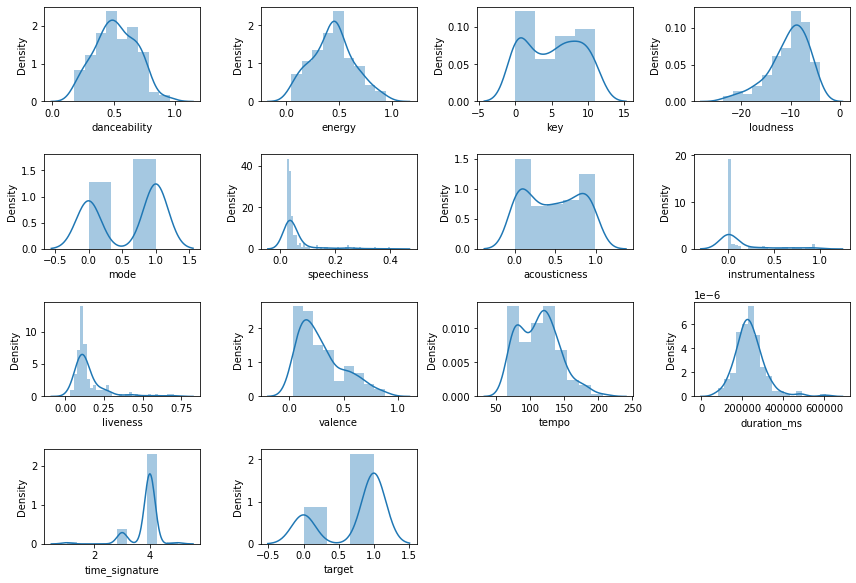

In [168]:
import seaborn as sns

numerical_features = result.select_dtypes(exclude=['object']).drop(['level_0', 'index'], axis=1).copy()

fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(numerical_features.iloc[:,i].dropna())
    plt.xlabel(numerical_features.columns[i])
plt.tight_layout()
plt.show()

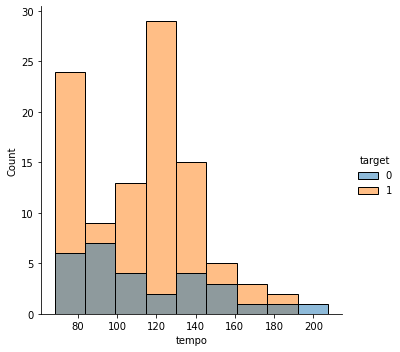

In [148]:
sns.displot(data=numerical_features, x="tempo", hue="target")

In [114]:
numerical_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
0,0.588,0.3620,8,-13.062,1,0.0295,0.4330,0.004680,0.0904,0.0995,132.472,379653,4,1
1,0.523,0.7690,4,-5.855,1,0.0269,0.0400,0.000000,0.1360,0.8760,136.162,244587,4,1
2,0.617,0.5670,0,-4.188,1,0.0828,0.0584,0.000000,0.0933,0.5050,90.246,217603,4,1
3,0.621,0.0948,10,-19.846,0,0.0350,0.9960,0.782000,0.0887,0.1580,77.818,120962,4,1
4,0.467,0.4610,1,-7.940,0,0.0274,0.3680,0.001150,0.3580,0.1880,131.325,280187,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.253,0.2980,3,-7.583,0,0.0294,0.2900,0.000000,0.1170,0.1030,139.722,226460,4,1
105,0.730,0.2850,11,-15.103,0,0.0319,0.8770,0.012600,0.1370,0.2840,107.140,330747,4,1
106,0.515,0.4300,7,-9.935,1,0.0369,0.0102,0.000141,0.1290,0.1040,91.841,238640,4,1
107,0.271,0.1650,5,-20.652,1,0.0351,0.7290,0.000002,0.1180,0.2030,77.082,139227,4,1


In [62]:
import matplotlib.pyplot as plt

color = []

for i in range(0, len(y)):
    if y[i] == 0:
        color.append("blue")
    else:
        color.append("magenta")

In [93]:
columns = []

for col in X.columns:
    columns.append(col)


109

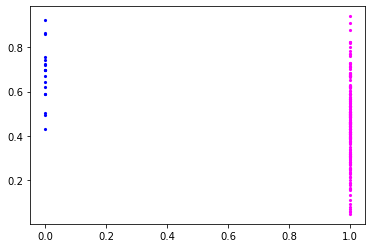

In [96]:
for i in range(0, 109):
    plt.scatter(y[i], X[columns[0]][i], c=color[i], s=10, linewidth = 0)
    

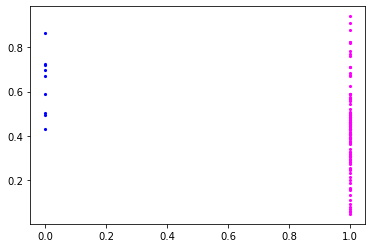

In [97]:
for i in range(0, 109):
    plt.scatter(y[i], X[columns[1]][i], c=color[i], s=10, linewidth = 0)

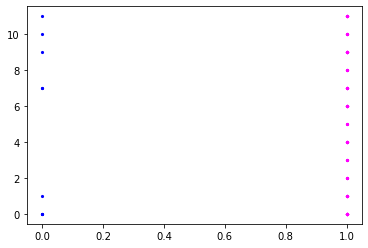

In [98]:
for i in range(0, 109):
    plt.scatter(y[i], X[columns[2]][i], c=color[i], s=10, linewidth = 0)